In [2]:
import pandas as pd
from model.data_preprocessing import load_and_preprocess_data
from model.split_scale import split_and_scale

from model.logistic_model import train_logistic
from model.decision_tree_model import train_decision_tree
from model.knn_model import train_knn
from model.naive_bayes_model import train_naive_bayes
from model.random_forest_model import train_random_forest
from model.xgboost_model import train_xgboost

from model.evaluate import evaluate_model

# Load and preprocess data
X, y, encoders = load_and_preprocess_data("adult.csv")

# Split and scale
X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test, scaler = split_and_scale(X, y)

results = []

# Train & evaluate each model
log_model = train_logistic(X_train_scaled, y_train)
results.append({"Model": "Logistic Regression", **evaluate_model(log_model, X_test_scaled, y_test)})

dt_model = train_decision_tree(X_train, y_train)
results.append({"Model": "Decision Tree", **evaluate_model(dt_model, X_test, y_test)})

knn_model = train_knn(X_train_scaled, y_train)
results.append({"Model": "KNN", **evaluate_model(knn_model, X_test_scaled, y_test)})

nb_model = train_naive_bayes(X_train_scaled, y_train)
results.append({"Model": "Naive Bayes", **evaluate_model(nb_model, X_test_scaled, y_test)})

rf_model = train_random_forest(X_train, y_train)
results.append({"Model": "Random Forest", **evaluate_model(rf_model, X_test, y_test)})

xgb_model = train_xgboost(X_train, y_train)
results.append({"Model": "XGBoost", **evaluate_model(xgb_model, X_test, y_test)})

# Show results
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy       AUC  Precision    Recall  F1 Score  \
0  Logistic Regression  0.817504  0.850060   0.713525  0.446072  0.548955   
1        Decision Tree  0.807558  0.743700   0.612839  0.616511  0.614670   
2                  KNN  0.818996  0.849777   0.652985  0.582557  0.615764   
3          Naive Bayes  0.797779  0.849760   0.698592  0.330226  0.448463   
4        Random Forest  0.854467  0.902700   0.748013  0.626498  0.681884   
5              XGBoost  0.861595  0.920449   0.763636  0.643142  0.698229   

        MCC  
0  0.461262  
1  0.486430  
2  0.499267  
3  0.379756  
4  0.592377  
5  0.613069  


In [3]:
import joblib
import os

os.makedirs("saved_models", exist_ok=True)

joblib.dump(log_model, "saved_models/logistic.pkl")
joblib.dump(dt_model, "saved_models/decision_tree.pkl")
joblib.dump(knn_model, "saved_models/knn.pkl")
joblib.dump(nb_model, "saved_models/naive_bayes.pkl")
joblib.dump(rf_model, "saved_models/random_forest.pkl")
joblib.dump(xgb_model, "saved_models/xgboost.pkl")

print("All models saved successfully!")


All models saved successfully!


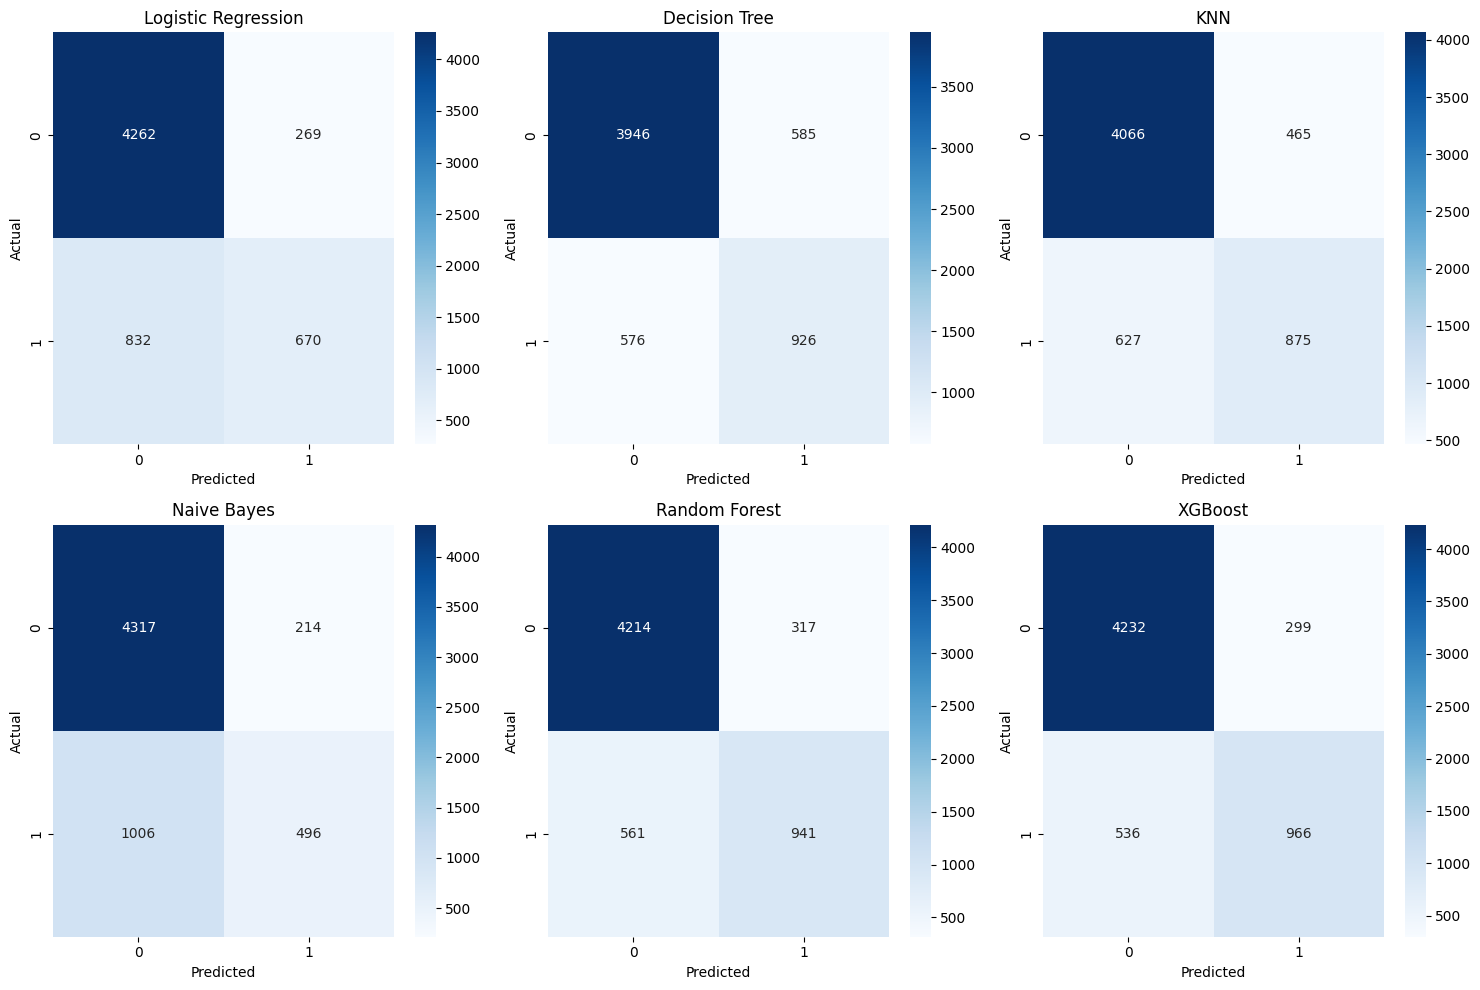

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models_dict = {
    "Logistic Regression": (log_model, X_test_scaled),
    "Decision Tree": (dt_model, X_test),
    "KNN": (knn_model, X_test_scaled),
    "Naive Bayes": (nb_model, X_test_scaled),
    "Random Forest": (rf_model, X_test),
    "XGBoost": (xgb_model, X_test)
}

plt.figure(figsize=(15, 10))

for i, (name, (model, X_data)) in enumerate(models_dict.items(), 1):
    y_pred = model.predict(X_data)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()
